<a href="https://colab.research.google.com/github/mszlafrok/Machine-learning-SM1/blob/main/plot_underfitting_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Underfitting vs. Overfitting

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
**cross-validation**. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.


In this example the training set are the blue noisy samples used to train a model (the blue polynomial function)

### Approximating a polynomial

$f(x) = c_0 + c_1x + c_2x^2 + \dotsb + c_{12}x^{12}$ for arbitrary constants $\{c_n\}$.

### Specificaly, we'll fit a cosine function using poilynomial linear regression

$cos(x) = 1 - \frac {x^2} {2!} + \frac {x^4} {4!} + ...$

The testing set is approximated by the true function in orange (but could be a new set of noisy points)

Automatically created module for IPython interactive environment
degree = 1 coefficients
[-1.88067006]


degree = 4 coefficients
[  1.41173185 -22.38794441  31.28209592 -11.28775939]


degree = 15 coefficients
[-2.86220744e+01  1.69567200e+03 -4.44162144e+04  6.32179284e+05
 -5.54473313e+06  3.21703698e+07 -1.29046883e+08  3.67713680e+08
 -7.54961750e+08  1.12004927e+09 -1.18958068e+09  8.81773836e+08
 -4.33167905e+08  1.26711883e+08 -1.67065120e+07]




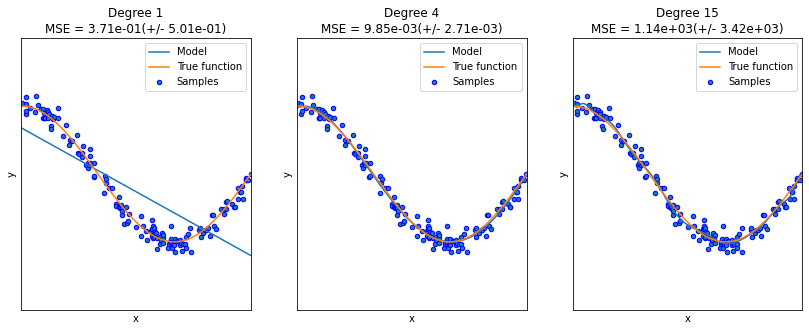

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 150
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    #print regression coefficients for different degrees
    print('degree = '+ str(degrees[i]) + ' coefficients')
    print(linear_regression.coef_)
    print('\n')
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#Note that overfitting leads to extremely high regression coefficients

#We'll see in the next class how ***regularization*** tackle this issue

#(BTW: Do you think that more training examples could decrease overfitting? Why?)

**answer to the question: yes, more training examples [aka - samples] decreases the overfitting. it make sense because it gives more eccurate data, and besides - i checked this issue and it might improve the MSE in number of orders**

**another point is - i raised the degree of the polynom and it raises the MSE **

##Inspect the polynomial features

In [6]:
polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X.reshape(-1, 1))

In [7]:
#X_poly = [x^0,x^1,x^2,...]
X,X_poly

(array([0.00469548, 0.0187898 , 0.0191932 , 0.02010755, 0.0202184 ,
        0.03918779, 0.06022547, 0.0641475 , 0.07103606, 0.0871293 ,
        0.09394051, 0.09609841, 0.09710128, 0.10022689, 0.10204481,
        0.11037514, 0.11827443, 0.11872772, 0.12019656, 0.1289263 ,
        0.13179786, 0.13547406, 0.13818295, 0.14335329, 0.15896958,
        0.16130952, 0.18319136, 0.19658236, 0.20887676, 0.21038256,
        0.22308163, 0.24442559, 0.24875314, 0.2532916 , 0.26455561,
        0.26538949, 0.27000797, 0.28280696, 0.28940609, 0.29007761,
        0.2961402 , 0.29743695, 0.29828233, 0.30157482, 0.31542835,
        0.31798318, 0.31856895, 0.3595079 , 0.36371077, 0.36756187,
        0.36872517, 0.38344152, 0.39650574, 0.41426299, 0.41466194,
        0.4236548 , 0.42385505, 0.4287687 , 0.43141844, 0.43586493,
        0.43703195, 0.43758721, 0.43860151, 0.44712538, 0.45615033,
        0.46147936, 0.46631077, 0.4686512 , 0.50132438, 0.52184832,
        0.52324805, 0.52889492, 0.54488318, 0.54